In [1]:
from ariel_experiments.utils.initialize import (
    generate_random_population_parallel,
)

from ariel_experiments.characterize.individual import (
    analyze_json_hash,
    analyze_mass,
    analyze_module_counts,
    analyze_json_hash_no_id,
)

from ariel_experiments.characterize.population import (
    # AnalyzedPopulation,
    get_full_analyzed_population,
    derive_numeric_summary,
    derive_uniques,
    derive_min_first_idx,
    derive_max_first_idx,
)

from ariel_experiments.gui_vis.visualize_data import (
    create_boxplot_from_raw,
    create_histogram_from_raw,
)

from ariel_experiments.gui_vis.gui import (
    IndividualVisualizer
)

from ariel_experiments.gui_vis.gui_simple import (
    SimpleNavigator
)


Initialize population

In [2]:
population_size = 100_000
population = generate_random_population_parallel(population_size)

Output()

Choose global analyzers (these will be applied to all individuals)

In [3]:
individual_analyzers = [
    analyze_module_counts,
    analyze_mass,
    analyze_json_hash,
    analyze_json_hash_no_id,
]

derivation_analyzers = [
    derive_numeric_summary,
    derive_uniques,
    derive_min_first_idx,
    derive_max_first_idx,
]

analyzed_population = get_full_analyzed_population(
    population, individual_analyzers, derivation_analyzers
)

Output()

Output()

In [4]:
analyzed_population.show_tree()

AnalyzedPopulation — props=9 derived_keys=9
├── raw
│   ├── brick: len=100000, type=numeric
│   ├── core: len=100000, type=numeric
│   ├── edges: len=100000, type=numeric
│   ├── hash: len=100000, type=str
│   ├── hash_no_id: len=100000, type=str
│   ├── hinge: len=100000, type=numeric
│   ├── mass: len=100000, type=numeric
│   ├── none: len=100000, type=numeric
│   └── not-none: len=100000, type=numeric
└── derived
    ├── brick
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   ├── numeric_stats
    │   └── uniques
    ├── core
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   ├── numeric_stats
    │   └── uniques
    ├── edges
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   ├── numeric_stats
    │   └── uniques
    ├── hash
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   └── uniques
    ├── hash_no_id
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   └── uniques
    ├── hinge
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   ├── numeric_stats
    │   └── uniques
    ├── mass
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   ├── numeric_stats
    │   └── uniques
    ├── none
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   ├── numeric_stats
    │   └── uniques
    └── not-none
        ├── max_first_idx
        ├── min_first_idx
        ├── numeric_stats
        └── uniques

Plot data of choice

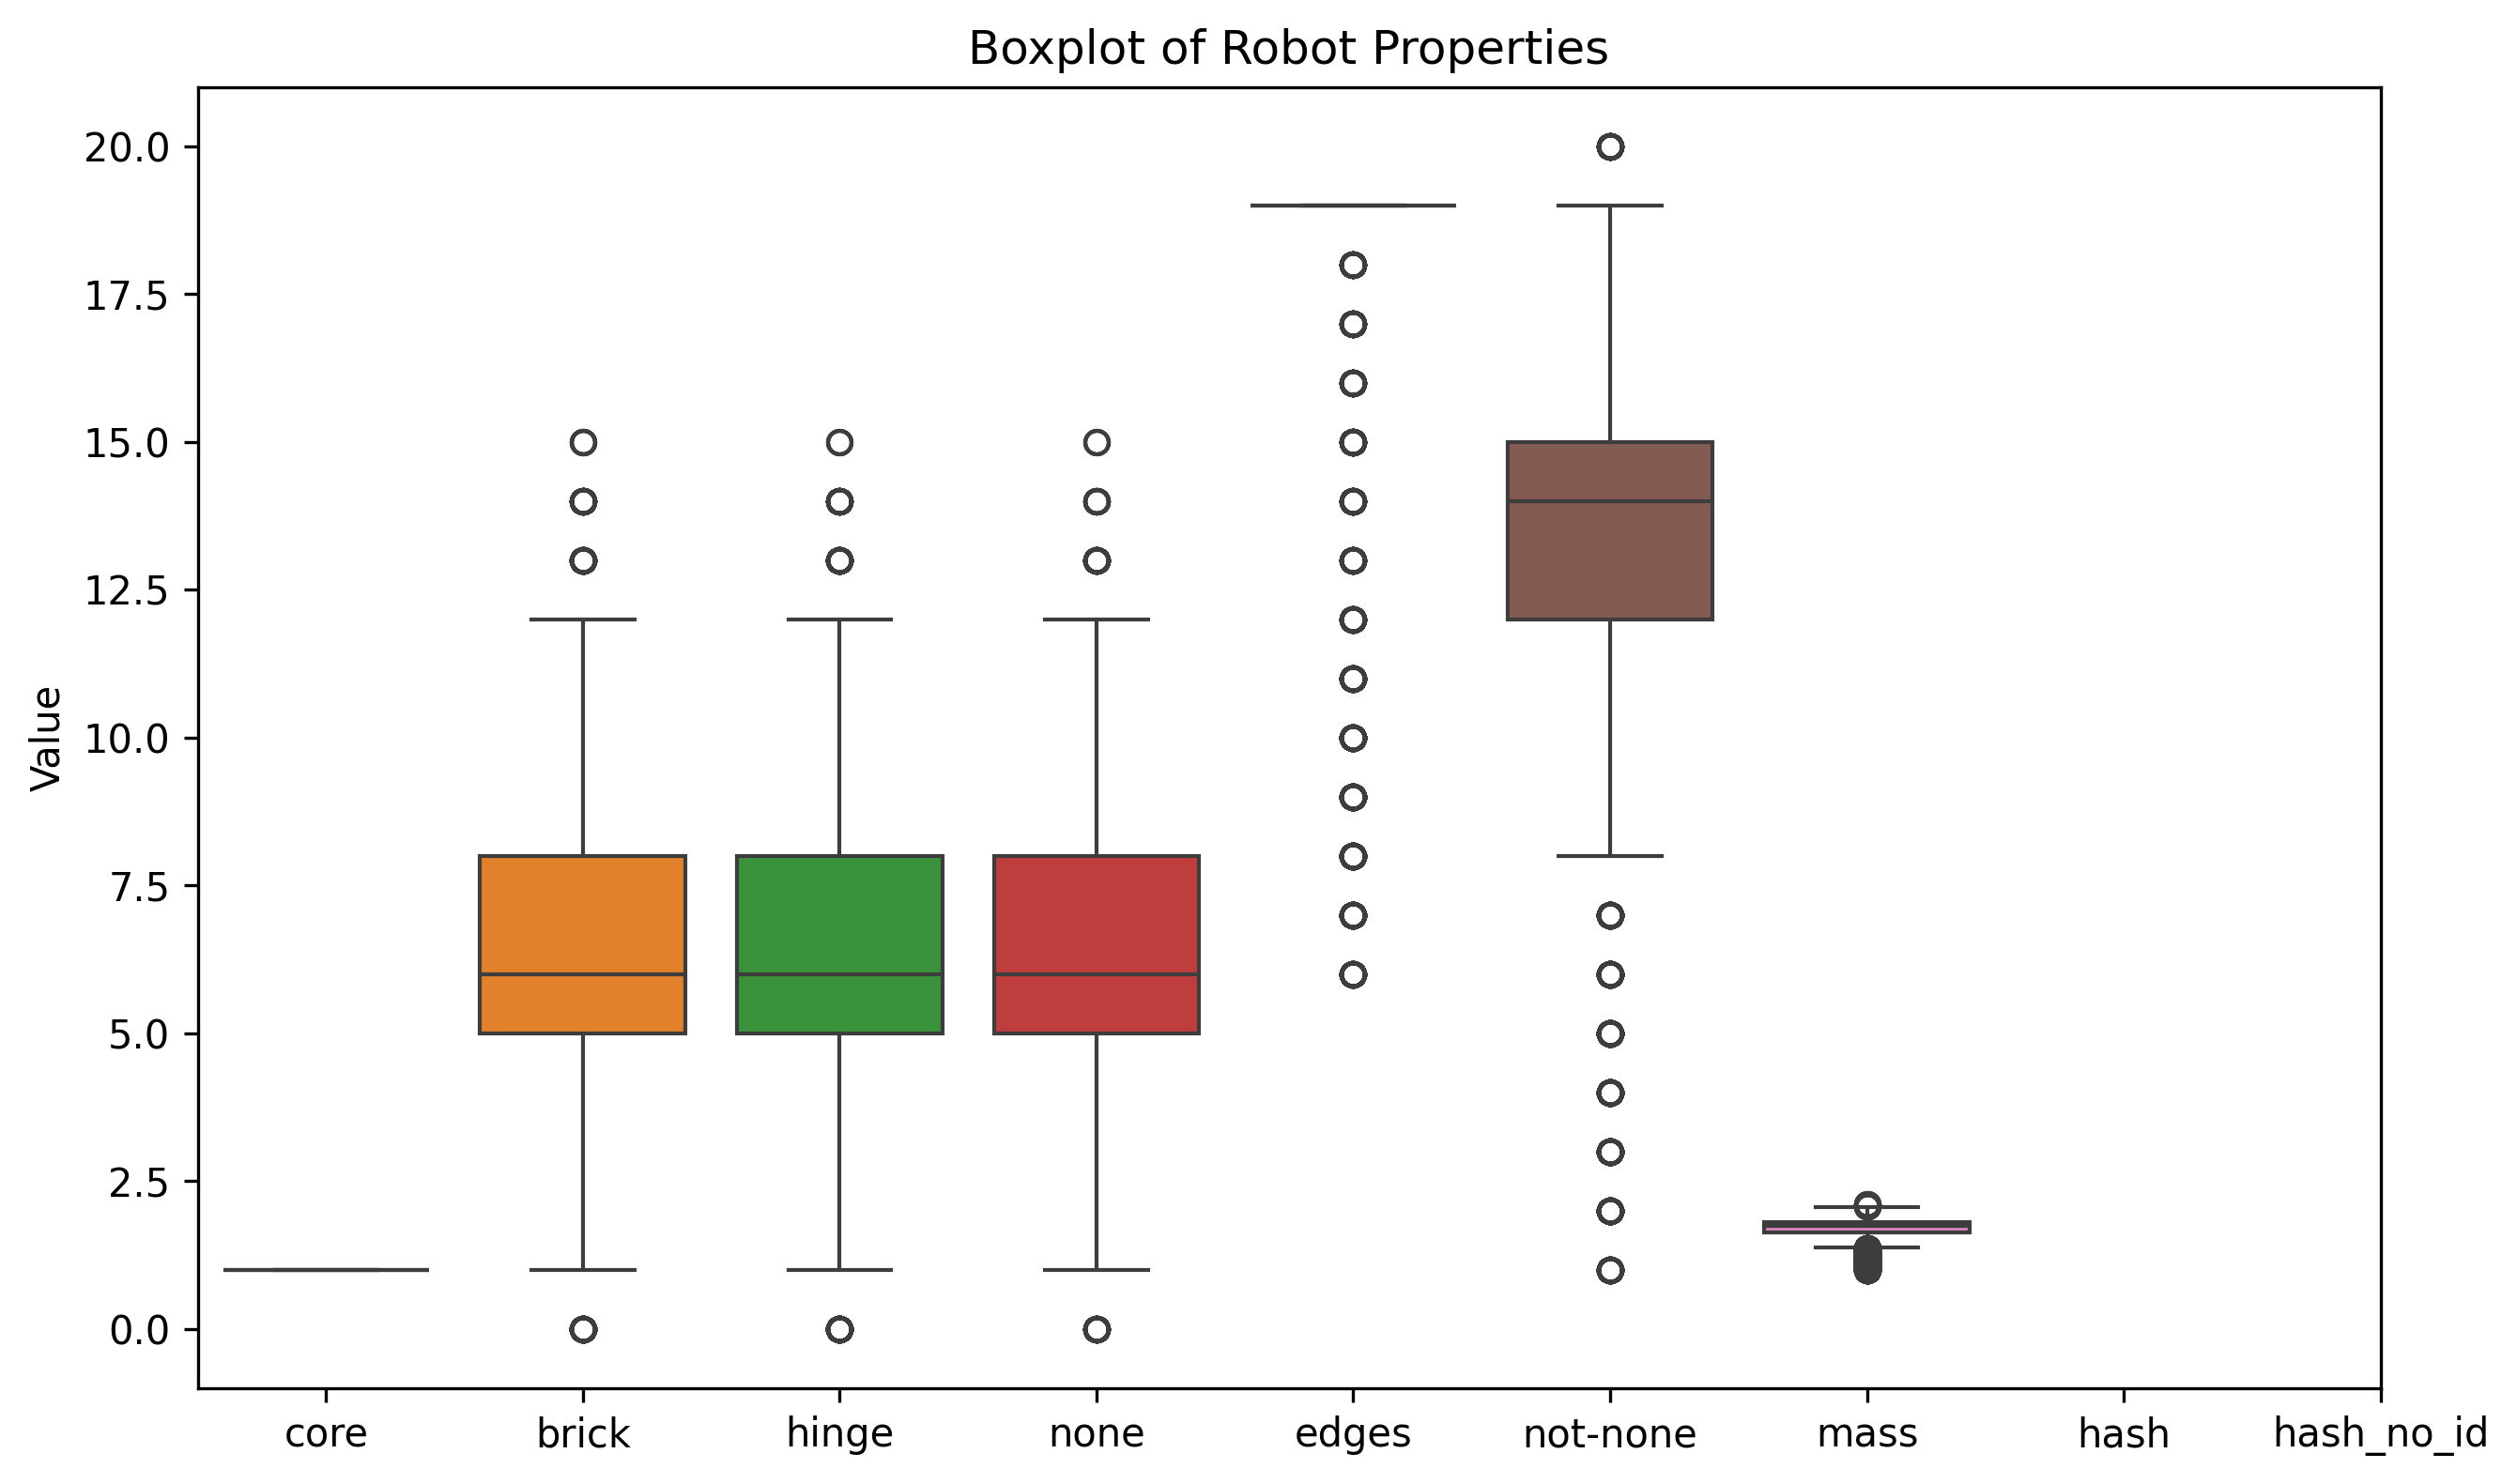

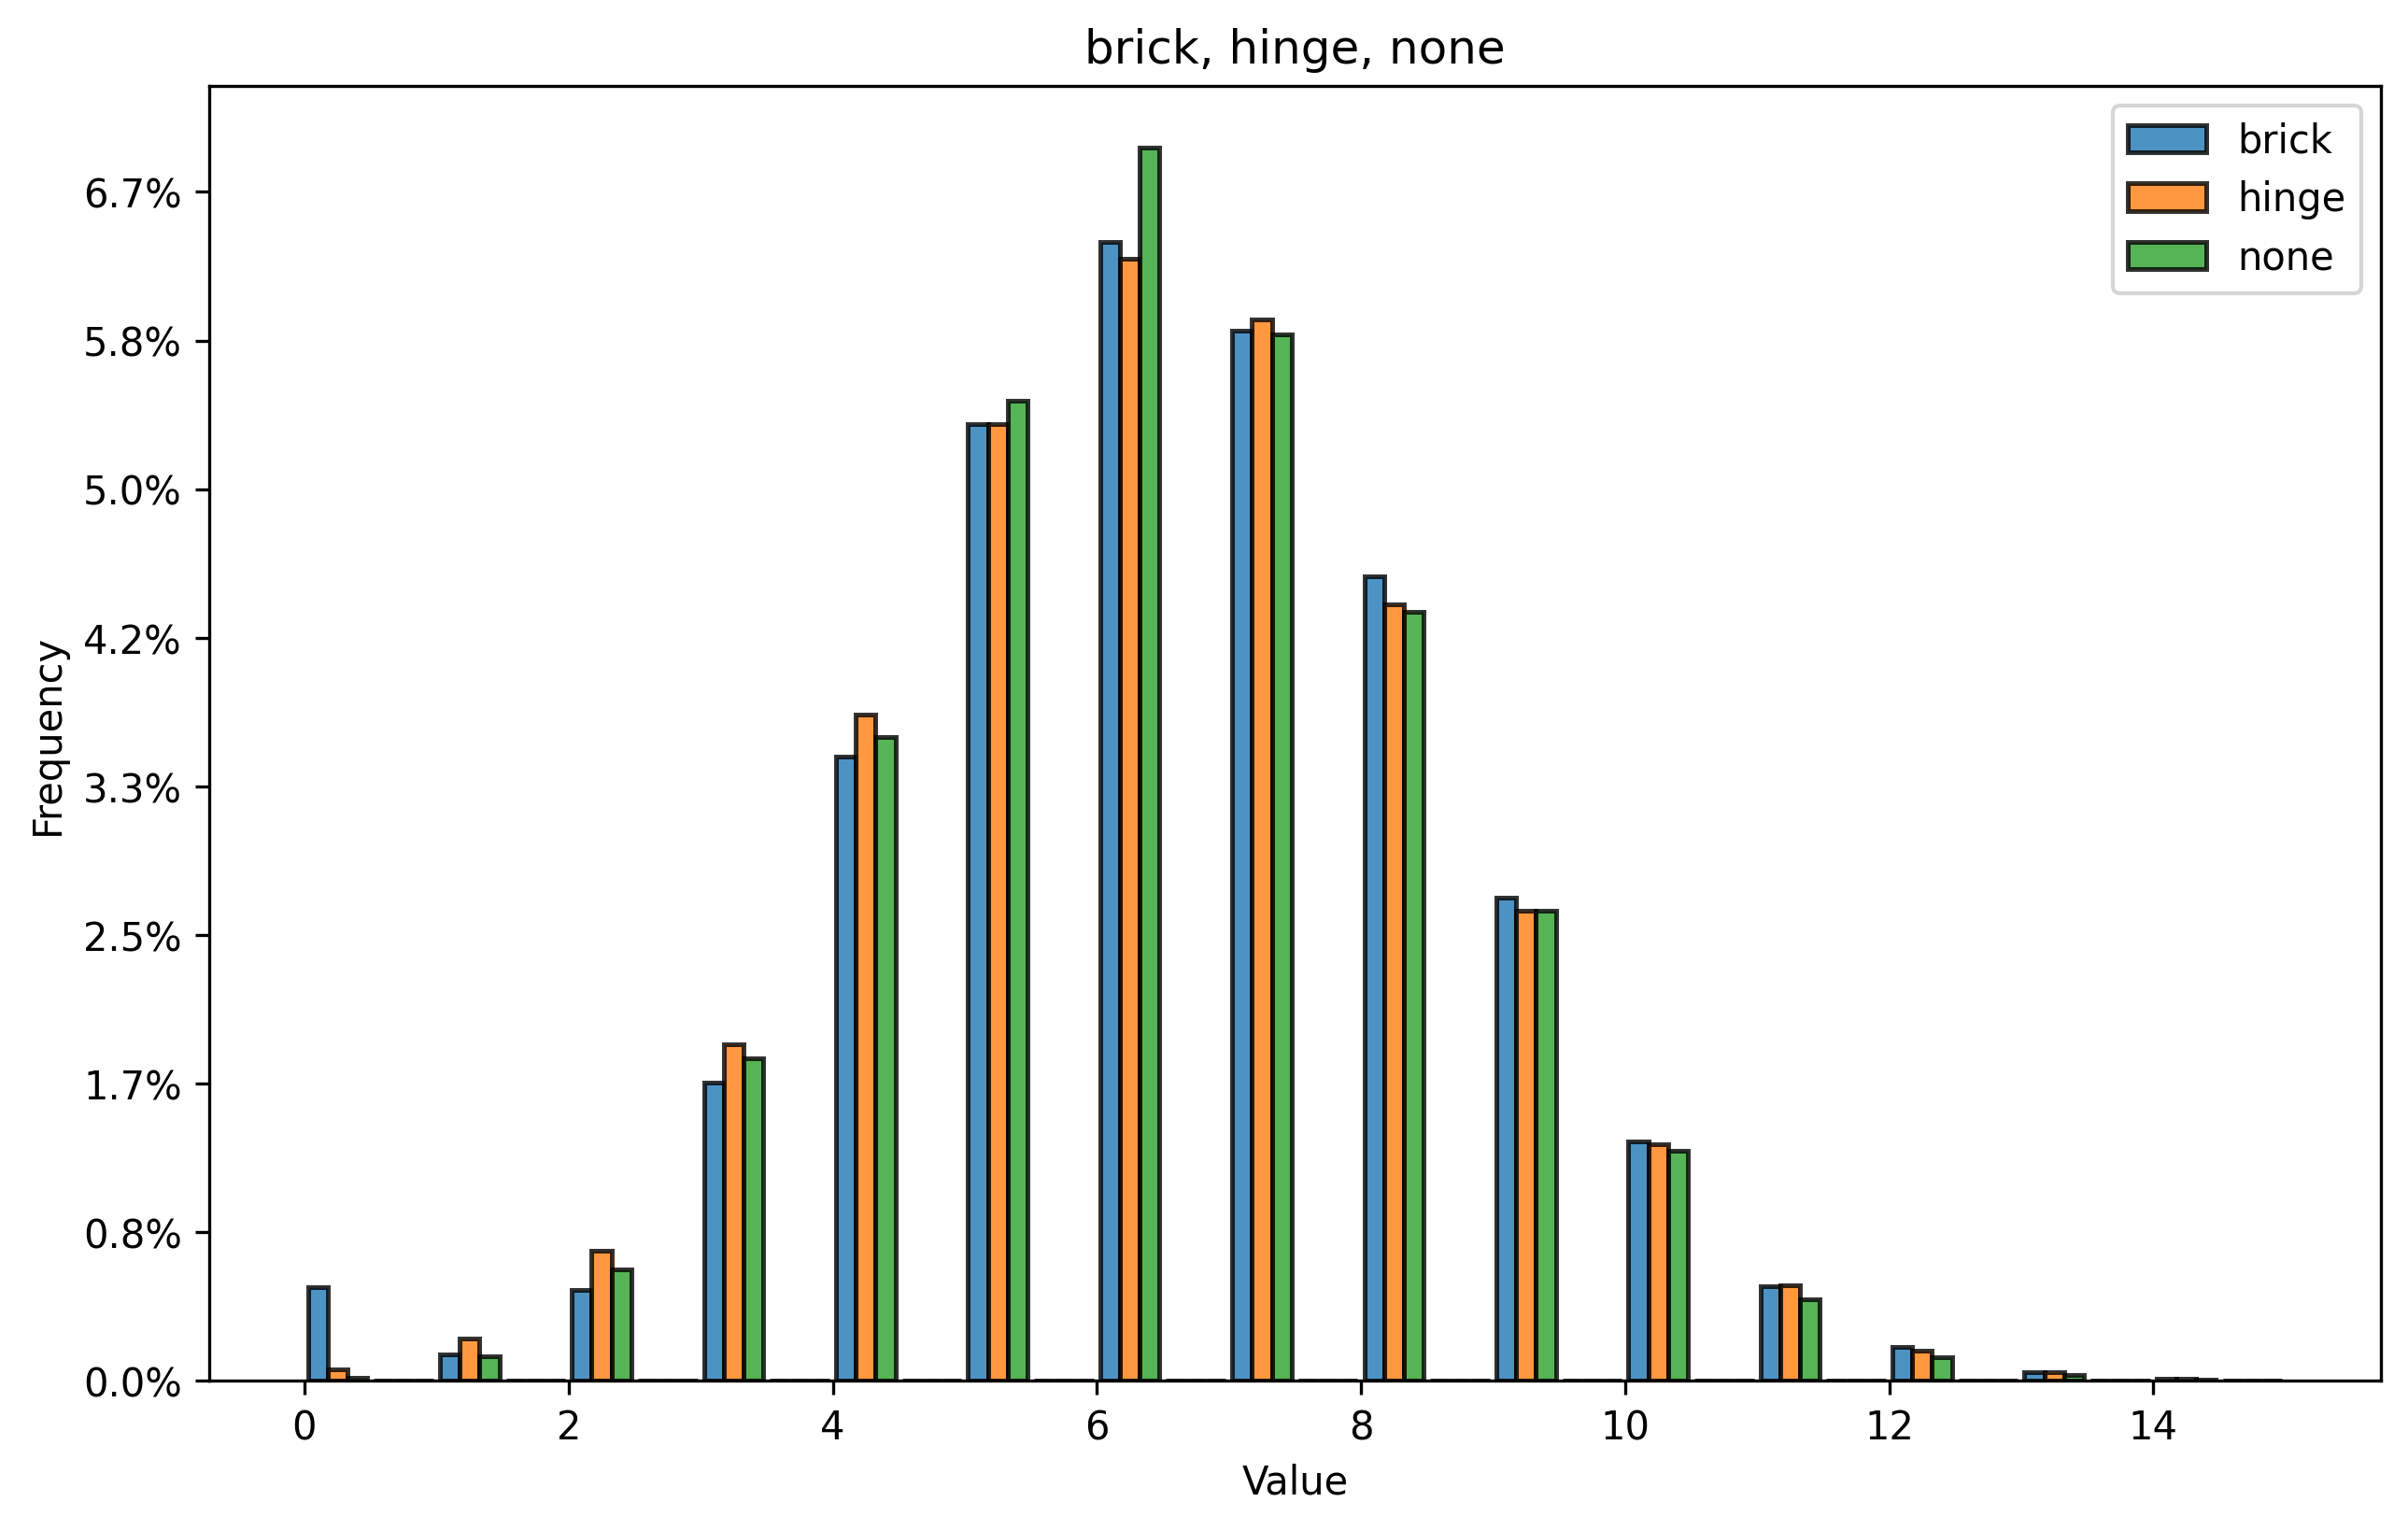

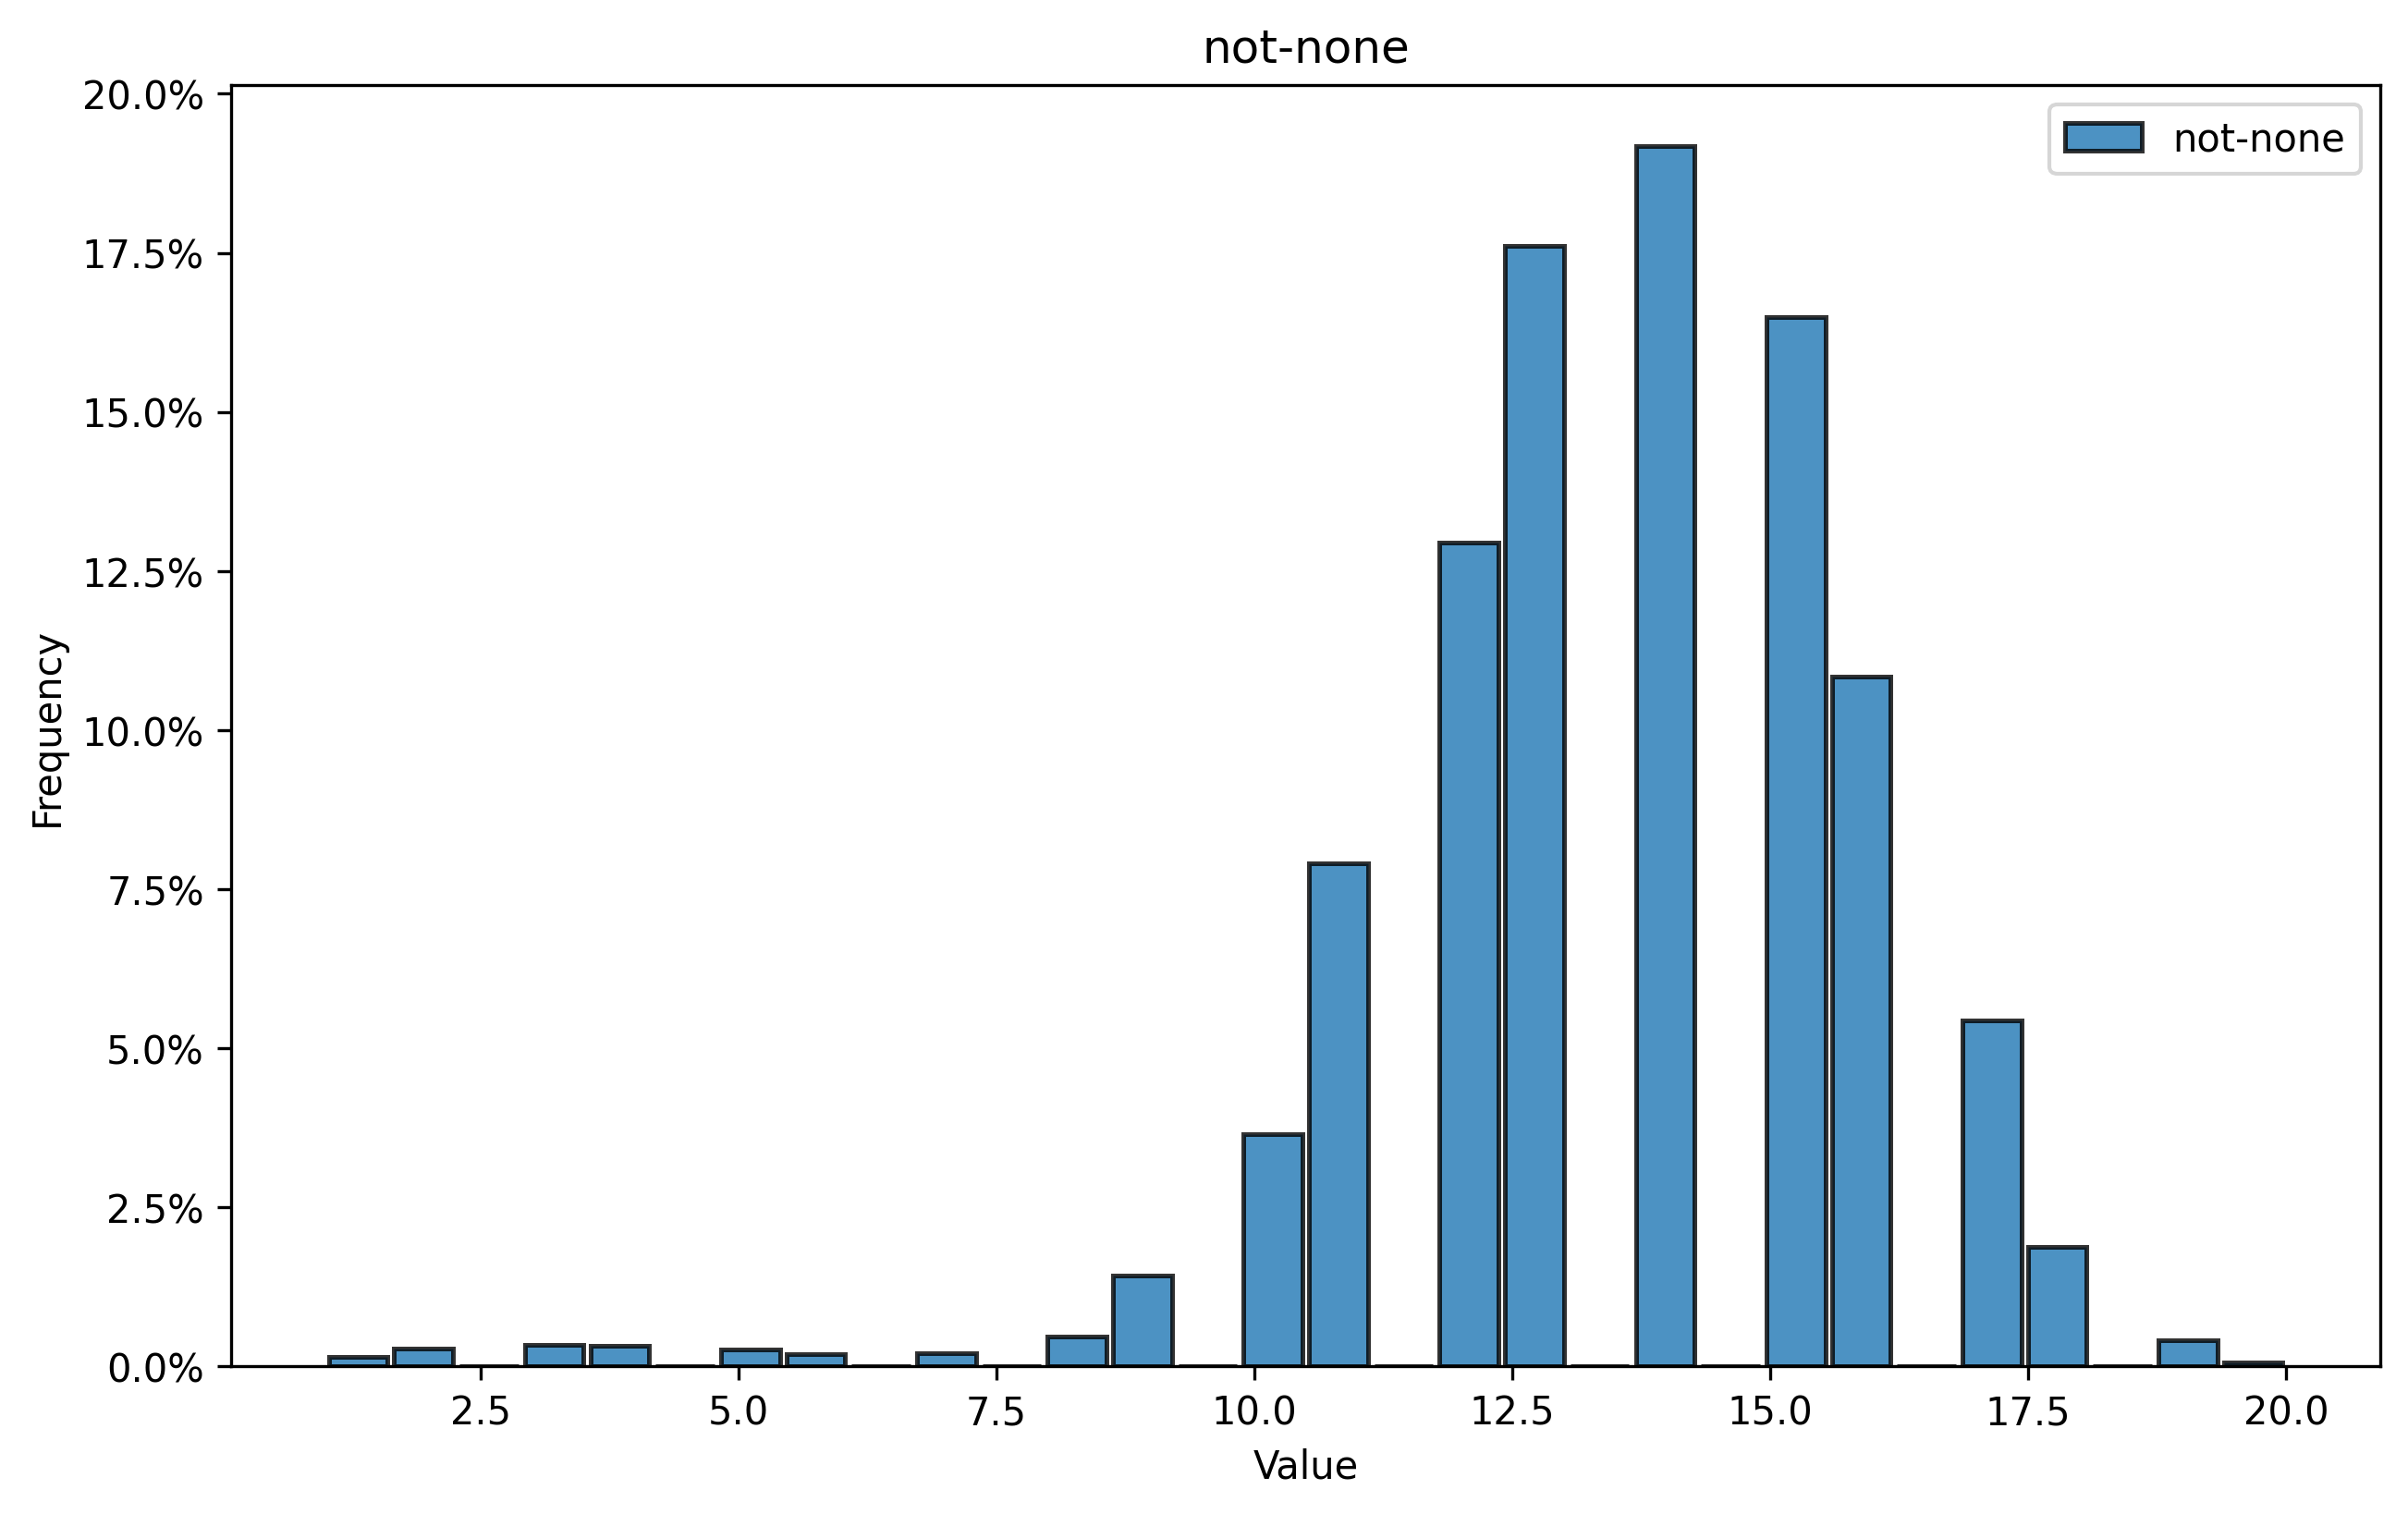

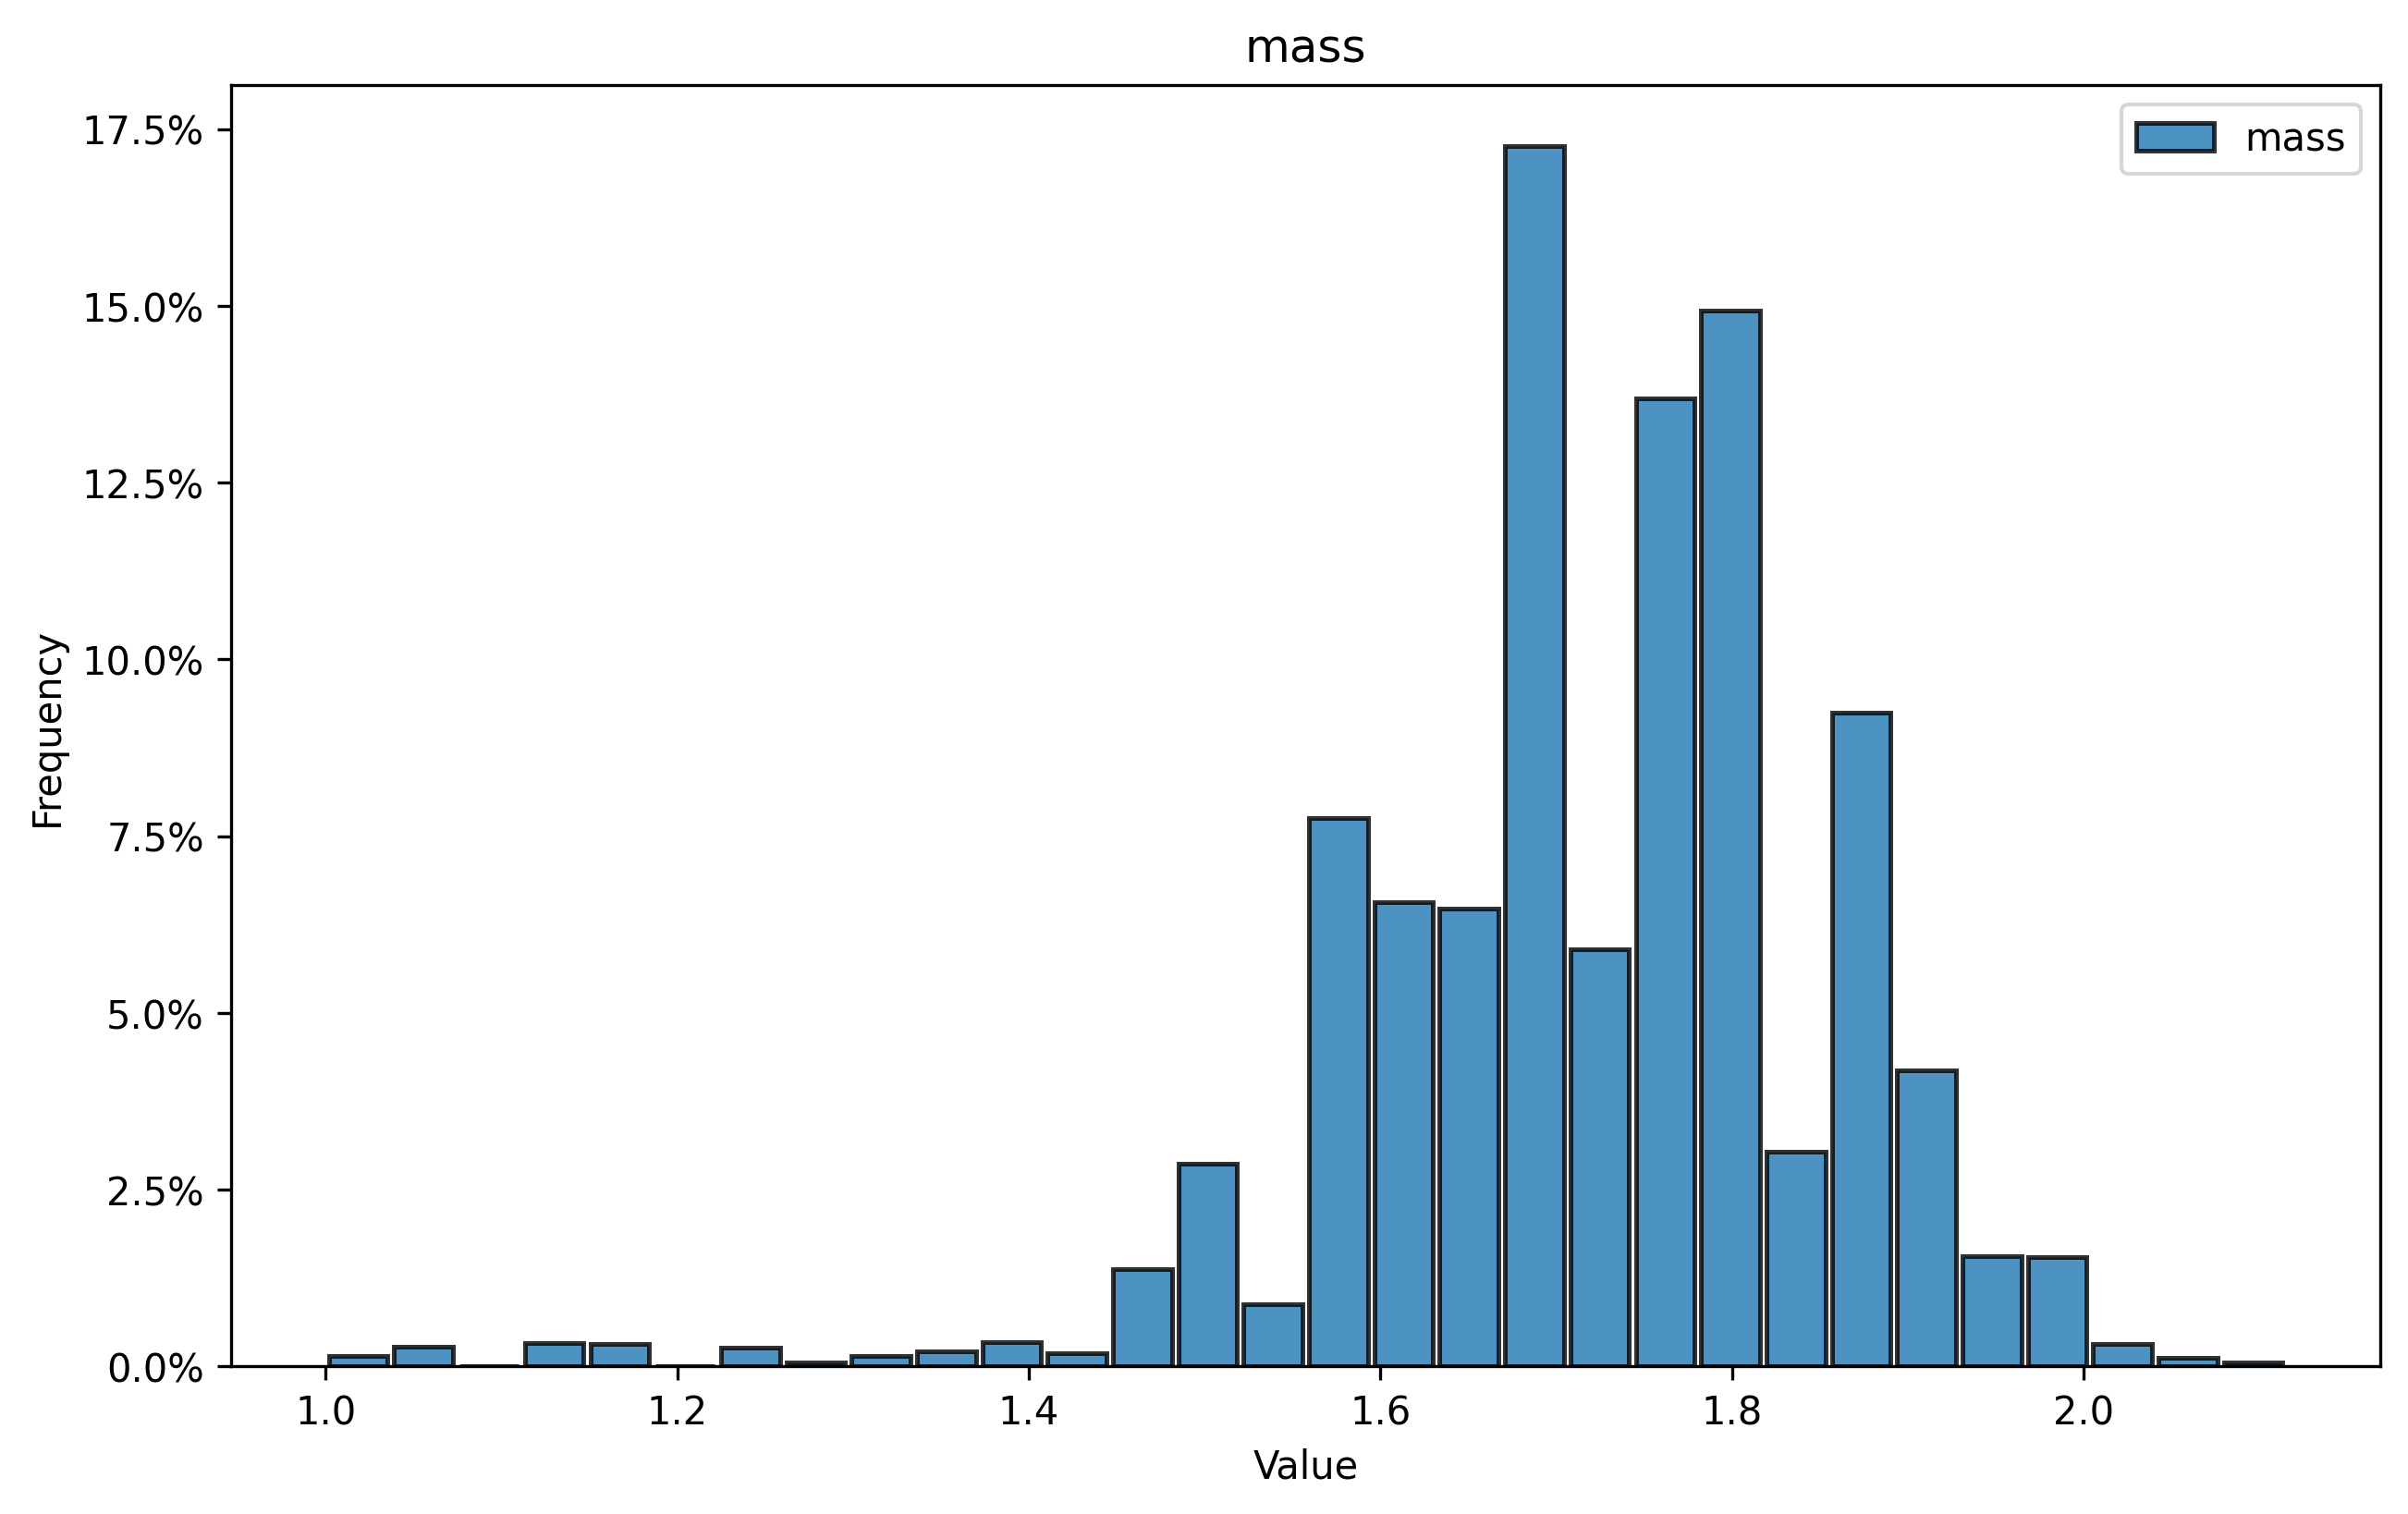

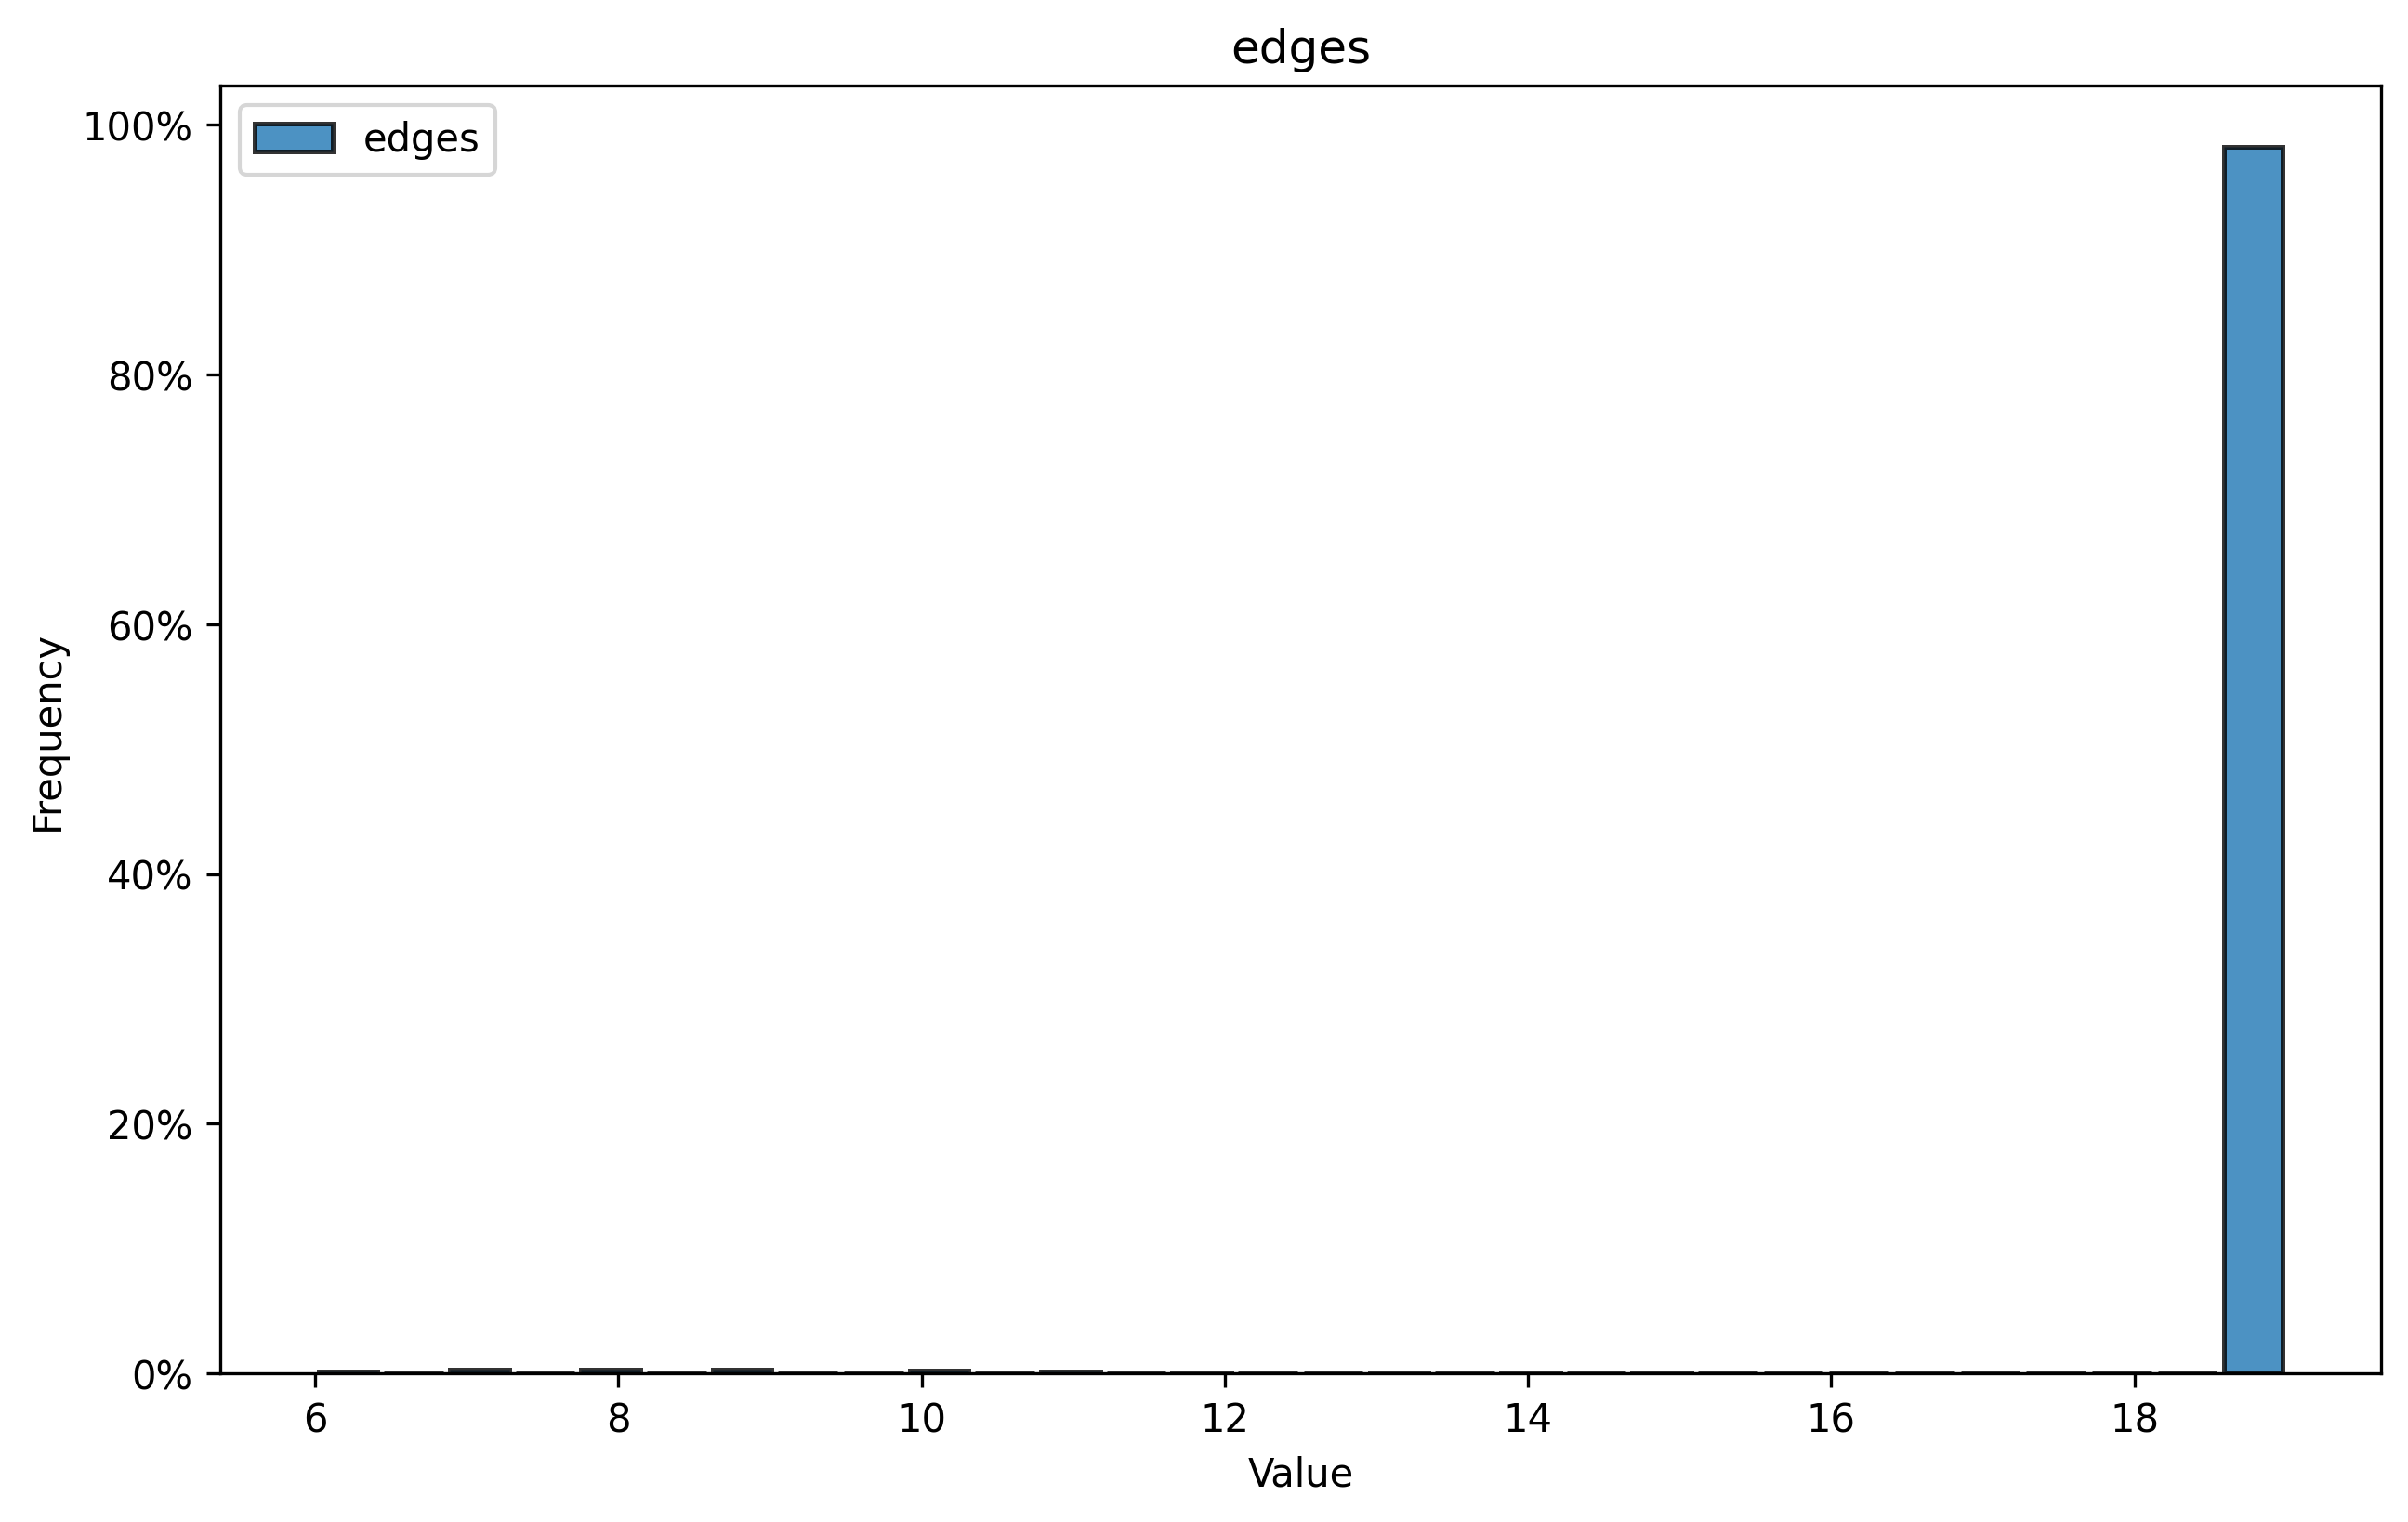

In [5]:
create_boxplot_from_raw(analyzed_population.raw)

create_histogram_from_raw(
    analyzed_population.raw, keys=["brick", "hinge", "none"]
)
create_histogram_from_raw(analyzed_population.raw, keys=["not-none"])
create_histogram_from_raw(analyzed_population.raw, keys=["mass"])
create_histogram_from_raw(analyzed_population.raw, keys=["edges"])

Use df to get insight into the same derived property across properties

In [6]:
analyzed_population.df_from_derived("numeric_stats")

,count,uniques,mean,std,median,Q1,Q3,num_outliers
property,,,,,,,,
core,100000,1,1.00,0.00,1.00,1.00,1.00,0
brick,100000,16,6.28,2.16,6.00,5.00,8.00,1752
hinge,100000,16,6.27,2.09,6.00,5.00,8.00,360
none,100000,16,6.28,2.00,6.00,5.00,8.00,161
edges,100000,14,18.83,1.29,19.00,19.00,19.00,1797
not-none,100000,20,13.55,2.37,14.00,12.00,15.00,1797
mass,100000,170,1.72,0.14,1.74,1.64,1.81,1797


In [7]:
analyzed_population.df_from_derived(
    "uniques",
    keys=["edges", "not-none"],
    sort_columns=True,
    save_file="counts.csv",
)

[01:10:40] saving file to /home/salo/projects/ariel-zoo/zoo/__data__/counts.csv                   ]8;id=417463;file:///home/salo/projects/ariel-zoo/src/ariel_experiments/characterize/population.py\population.py]8;;\:]8;id=23952;file:///home/salo/projects/ariel-zoo/src/ariel_experiments/characterize/population.py#687\687]8;;\

,1.count,2.count,3.count,4.count,5.count,6.count,7.count,8.count,9.count,10.count,11.count,12.count,13.count,14.count,15.count,16.count,17.count,18.count,19.count,20.count
property,,,,,,,,,,,,,,,,,,,,
edges,NaN,NaN,NaN,NaN,NaN,147,277,319,289,225,142,95,70,57,56,46,37,37,98203,NaN
not-none,147.0,279.0,332.0,317.0,263.0,189,213,467,1425,3649,7907,12941,17605,19176,16484,10835,5429,1870,415,57.0


Use simple navigator to scan easily through values

In [ ]:
simple_navigator = SimpleNavigator(analyzed_population.to_dict())

Use IndidvidualVisualizer to visualize the graphs

In [1]:
individual_visualizer = IndividualVisualizer(index_dict=analyzed_population.derived, population=population)

NameError: name 'IndividualVisualizer' is not defined